# KNN in Python with Iris Dataset

K-nearest neighbor example with Iris dataset.

Uses K-nearest neighbor voting to decide classification. 

Dataset contains data on 3 types of Iris flowers.

There are 4 features in the data set.

Will start with two features and build up.

NOTE: Should scale data if not on same scale. 

# Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Visualization

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

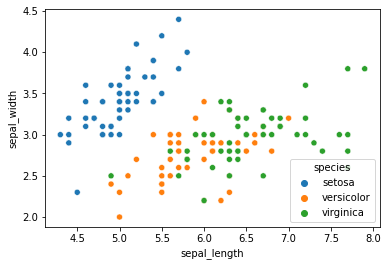

In [4]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

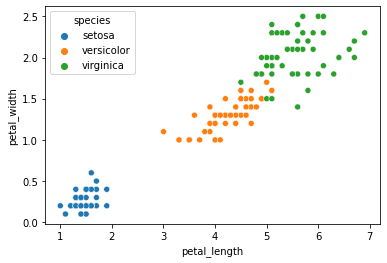

In [5]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

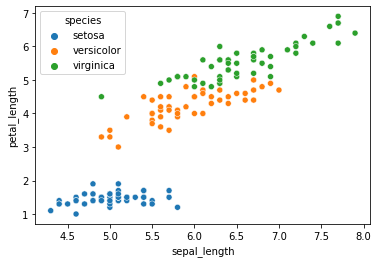

In [6]:
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

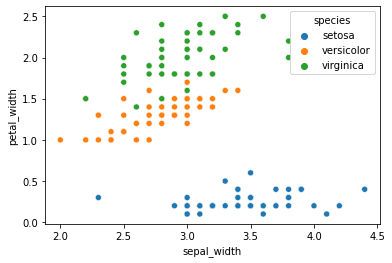

In [7]:
sns.scatterplot(data=df, x='sepal_width', y='petal_width', hue='species')

# KNN with 2 features

In [8]:
X1 = df[['sepal_length', 'sepal_width']]

In [9]:
X1

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [10]:
y = df.species

In [11]:
X1_train, X1_test, y_train, y_test = train_test_split(X1,y,test_size=0.2, random_state=42, stratify=y)

In [12]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train.values, y_train)
    predI = knn.predict(X1_test.values)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

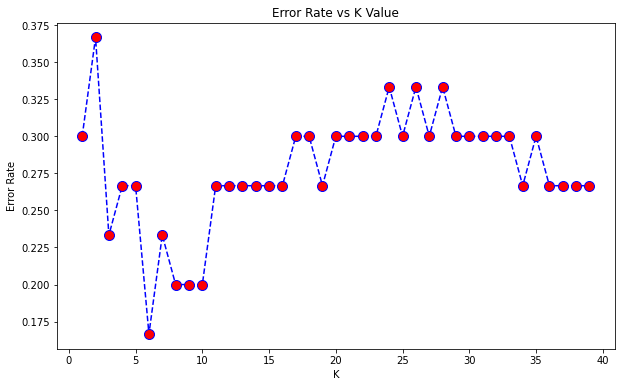

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
knn1 = KNeighborsClassifier(n_neighbors=6)
knn1.fit(X1_train.values, y_train)
pred = knn1.predict(X1_test.values)

In [15]:
print(confusion_matrix(y_test, pred))

[[10  0  0]
 [ 0  8  2]
 [ 0  3  7]]


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.73      0.80      0.76        10
   virginica       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



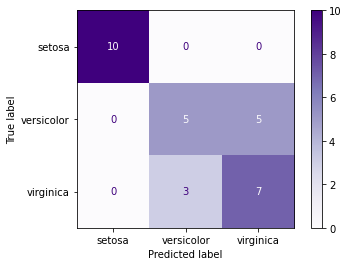

In [17]:
ConfusionMatrixDisplay.from_estimator(knn, X1_test.values, y_test, cmap='Purples')

# All 4 features

In [18]:
X2 = df.drop('species', axis=1)

In [19]:
X2

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size=0.2, random_state=42, stratify=y)

In [21]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train.values, y_train)
    predI = knn.predict(X2_test.values)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

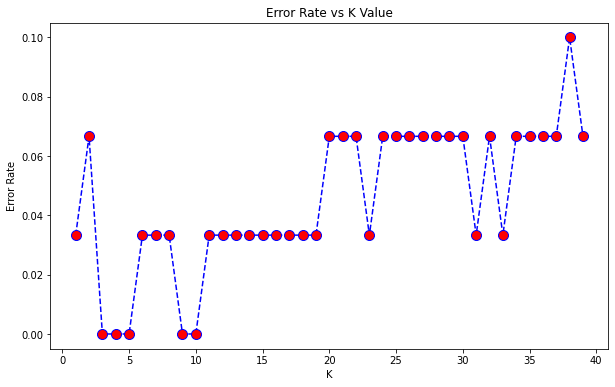

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X2_train.values, y_train)
pred = knn2.predict(X2_test.values)

In [24]:
print(confusion_matrix(y_test, pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



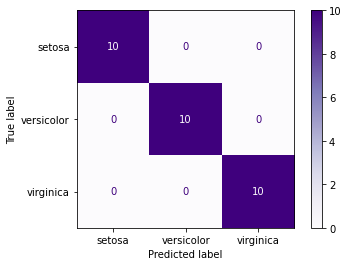

In [26]:
ConfusionMatrixDisplay.from_estimator(knn2, X2_test.values, y_test, cmap='Purples')